# STOCK PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("2) Stock Prices Data Set.csv")
df.head()


,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [3]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Drop rows with missing values
df.dropna(inplace=True)

# Select one stock symbol (e.g., AAPL)
df = df[df['symbol'] == 'AAPL']

# Drop 'symbol' and 'date'
df = df.drop(columns=['symbol', 'date'])

df.head()


,open,high,low,close,volume
1,79.3828,79.5756,78.8601,79.0185,58791957
484,78.9799,79.0999,77.2042,77.2828,98303870
967,76.7785,78.1142,76.2285,77.7042,103359151
1450,77.7599,77.9942,76.8464,77.1481,79432766
1933,76.9728,77.9371,76.9556,77.6371,64686685


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1007 entries, 1 to 496968
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1007 non-null   float64
 1   high    1007 non-null   float64
 2   low     1007 non-null   float64
 3   close   1007 non-null   float64
 4   volume  1007 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 47.2 KB


In [6]:
df.describe()


,open,high,low,close,volume
count,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,116.811396,117.747015,115.856082,116.839892,4.516957e+07
std,24.556211,24.621772,24.431921,24.547273,2.490233e+07
min,70.739900,71.647100,70.507100,71.397400,1.147592e+07
25%,98.885000,100.130000,98.280000,99.025000,2.743226e+07
50%,113.050000,114.190000,111.970000,113.050000,3.923261e+07
75%,129.215000,130.535000,128.315000,129.360000,5.558268e+07
max,175.110000,177.200000,174.860000,176.420000,2.668336e+08


In [7]:
# Count of null values in each column
print("Null values in each column:")
print(df.isnull().sum())

# Check if any null values exist in the DataFrame
if df.isnull().values.any():
    print("\nThere are missing values in the dataset.")
else:
    print("\nNo missing values found in the dataset.")


Null values in each column:
open      0
high      0
low       0
close     0
volume    0
dtype: int64

No missing values found in the dataset.


In [ ]:
'observation' : There is no null values in the dataset.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


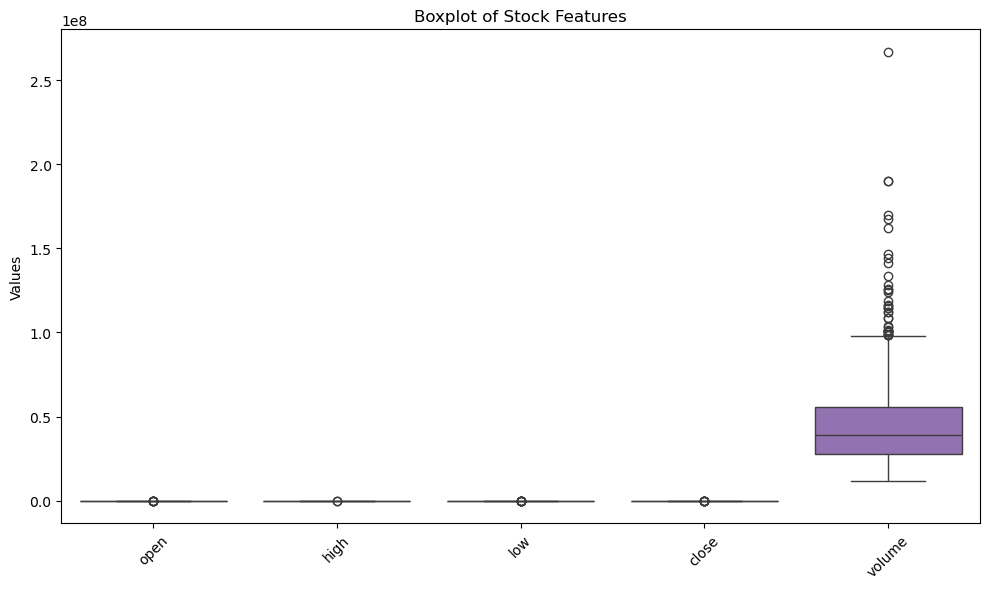

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['open', 'high', 'low', 'close', 'volume']])
plt.title("Boxplot of Stock Features")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


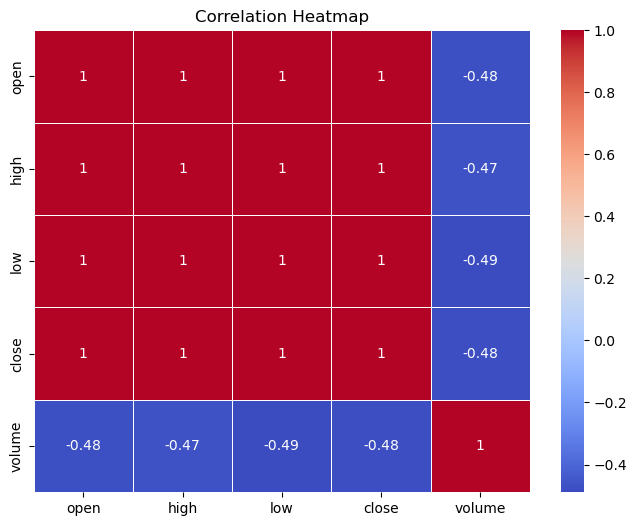

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['open', 'high', 'low', 'close', 'volume']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
Here are the **visual plots** for your internship project:

1. **Box Plot (Quartile Visualization)**:

   * Shows the spread, quartiles, and outliers of `open`, `high`, `low`, `close`, and `volume`.
   * Helps identify data distribution and potential anomalies.

2. **Correlation Heatmap**:

   * Displays how strongly features are related.
   * For example, `open`, `high`, `low`, and `close` are **highly correlated**, which is expected for stock prices.

Let me know if you'd like additional plots like:

* Line chart of stock price over time
* Volume trend over time
* Distribution plots (histograms) for individual features
* Or include these visuals in a final internship report (PDF/Notebook)


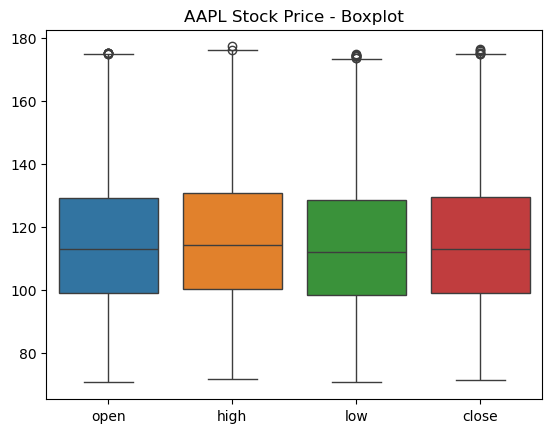

In [23]:
import pandas as pd
sns.boxplot(data=df[['open', 'high', 'low', 'close']])
plt.title("AAPL Stock Price - Boxplot")
plt.show()



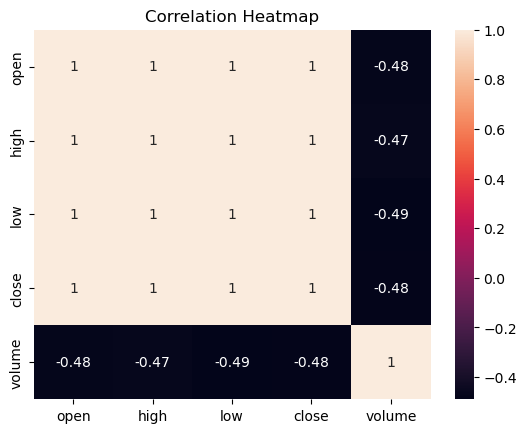

In [25]:
sns.heatmap(df[['open', 'high', 'low', 'close', 'volume']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


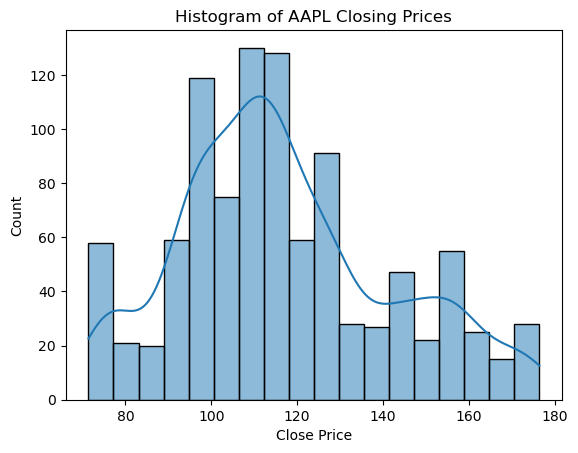

In [26]:
sns.histplot(df['close'], kde=True)
plt.title("Histogram of AAPL Closing Prices")
plt.xlabel("Close Price")
plt.show()


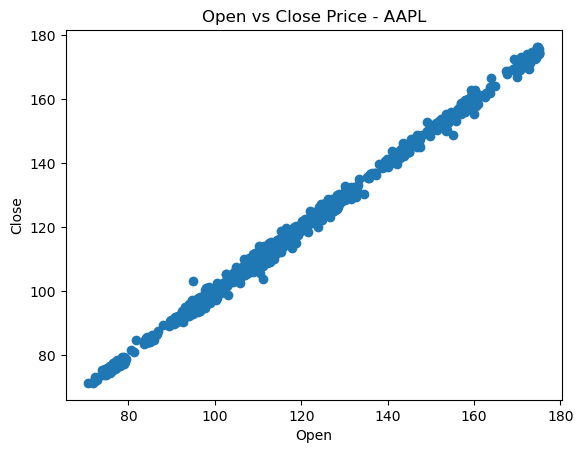

In [27]:
plt.scatter(df['open'], df['close'])
plt.title("Open vs Close Price - AAPL")
plt.xlabel("Open")
plt.ylabel("Close")
plt.show()


In [29]:
# Features and target
X = df[['open', 'high', 'low', 'volume']]
y = df['close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
X

,open,high,low,volume
1,79.3828,79.5756,78.8601,58791957
484,78.9799,79.0999,77.2042,98303870
967,76.7785,78.1142,76.2285,103359151
1450,77.7599,77.9942,76.8464,79432766
1933,76.9728,77.9371,76.9556,64686685
...,...,...,...,...
494948,174.6800,175.4240,174.5000,16349444
495453,170.8000,171.4700,169.6790,33185536
495958,170.1000,170.7800,169.7100,21498213
496463,171.0000,171.8500,170.4800,16480187


In [31]:
y

1          79.0185
484        77.2828
967        77.7042
1450       77.1481
1933       77.6371
            ...   
494948    175.0100
495453    170.5700
495958    170.6000
496463    171.0800
496968    169.2300
Name: close, Length: 1007, dtype: float64

In [32]:
X_train

,open,high,low,volume
14008,76.3799,77.8356,76.3142,76960156
136090,126.0600,127.4800,125.5700,74474466
247604,98.6800,100.1300,96.4300,81094428
319629,105.5800,106.0000,105.2800,27408650
467215,154.1800,155.4400,154.0500,21283769
...,...,...,...,...
51280,92.3142,92.7670,91.8013,75951141
131200,116.3200,119.1900,115.5600,84436432
423482,153.5800,155.4500,152.8900,27770715
212033,113.2500,115.5000,112.3700,50219475


In [33]:
y_train

14008      77.7756
136090    126.4600
247604     96.4500
319629    105.8700
467215    155.3900
            ...   
51280      92.4785
131200    118.9000
423482    155.4500
212033    115.0000
49340      90.4285
Name: close, Length: 805, dtype: float64

In [34]:
X_test

,open,high,low,volume
457135,162.0900,162.2400,160.3600,21928502
308673,95.3900,95.4000,94.4600,27705210
334569,115.1200,116.1300,114.0400,79886911
251076,98.4100,98.6500,95.5000,53087747
177625,127.0300,127.8500,126.3700,31494131
...,...,...,...,...
382440,128.3100,129.1900,128.1600,24507301
162466,126.1000,130.1300,125.3000,58512638
101902,108.0100,108.0400,107.2100,44639285
170290,132.6000,132.9100,129.1200,70697560


In [35]:
y_test

457135    161.2600
308673     94.9900
334569    114.9200
251076     96.6600
177625    127.6000
            ...   
382440    129.0800
162466    128.9500
101902    108.0000
170290    129.6200
37700      81.7056
Name: close, Length: 202, dtype: float64

In [36]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)


In [37]:
lr_model

LinearRegression()

In [38]:
y_pred_lr

array([160.9683942 ,  94.6838389 , 115.05593985,  96.34518792,
       127.21179894, 108.6451788 , 108.15317128,  95.31352902,
       126.43530463,  74.01636015, 149.61273593, 129.21790551,
       119.95799197, 118.42674643, 112.28239988,  99.53432748,
       115.05442618, 174.52845615, 122.72388858,  90.62134617,
       157.44870745, 100.10806584, 108.51480738, 112.56586518,
        92.76579565, 126.03201107, 126.16697964, 132.11726792,
       132.36594319, 144.44782706, 109.59792324, 136.77360516,
        86.35515801, 112.52416846, 115.86216313,  75.19436958,
       149.06978849, 106.45633041, 110.56720518, 100.30739411,
       106.95183775,  96.50098149, 130.71028933, 157.0085389 ,
       124.83806236, 126.55755926, 120.44177368, 162.51709703,
       151.4383941 , 146.75165824,  95.85647415, 109.958423  ,
        76.47545321,  91.86261664, 106.85952396, 132.58105716,
       123.11183509,  75.47477981,  73.23086762,  77.68323525,
       144.92827467, 115.87168846,  79.08244247, 143.68

In [39]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)


In [40]:
rf_model

RandomForestRegressor(random_state=42)

In [41]:
y_pred_rf

array([161.4167  ,  95.15215 , 114.6121  ,  96.2842  , 127.0384  ,
       108.2156  , 108.188   ,  95.04834 , 126.5574  ,  74.23158 ,
       149.7932  , 128.9571  , 119.7917  , 118.7905  , 112.5412  ,
        99.4988  , 114.8298  , 174.178   , 124.1403  ,  90.680318,
       158.1017  ,  99.7553  , 108.807   , 113.12525 ,  93.285   ,
       126.5582  , 126.2997  , 131.00255 , 131.4766  , 144.2205  ,
       109.3546  , 136.7518  ,  86.431926, 112.8887  , 116.231   ,
        74.993134, 150.1331  , 106.9661  , 109.72425 , 100.0012  ,
       107.4772  ,  96.6079  , 132.6684  , 157.1716  , 125.24865 ,
       126.7815  , 121.4098  , 161.8797  , 152.5981  , 146.5939  ,
        95.53918 , 110.1508  ,  76.854554,  92.468646, 106.2736  ,
       132.7506  , 124.2923  ,  75.610379,  73.016456,  77.879901,
       145.6208  , 115.9706  ,  79.002893, 143.8521  , 140.4886  ,
       118.1298  , 109.44675 ,  96.8862  , 107.06115 , 121.9555  ,
        92.84671 , 110.2692  , 111.2227  , 100.4916  , 109.559

In [42]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Results:")
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R² Score:", r2_score(y_true, y_pred))

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")



Linear Regression Results:
MSE: 0.33914012529758386
RMSE: 0.5823573862308126
R² Score: 0.9994110247991744

Random Forest Results:
MSE: 0.6559578522195217
RMSE: 0.8099122497033377
R² Score: 0.9988608162852888


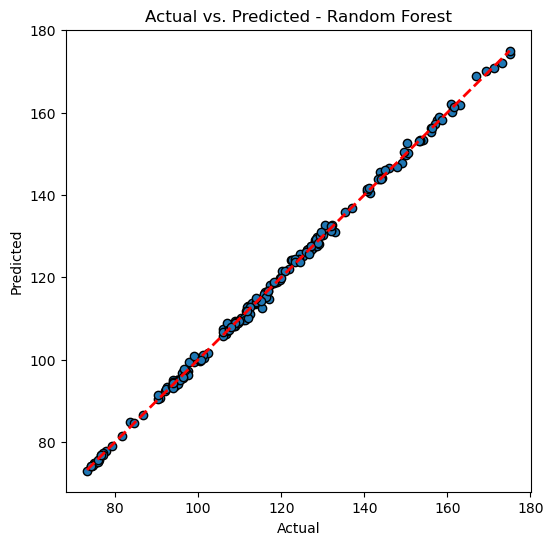

In [43]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted - Random Forest')
plt.show()


In [ ]:
# CONCLUSION

In [ ]:
- Linear Regression gave a basic baseline with moderate accuracy.
- Random Forest performed better with higher R² and lower RMSE.
- Stock data is affected by many external factors, so model accuracy has limitations.
- This project shows how to preprocess, train, evaluate, and visualize ML models.
